# Digital Skills and Gender Equality Analysis
This notebook investigates the relationship between the Gender Equality Index (GE-idx) and digital skills across different demographics in Europe. The analysis examines age groups and education levels for both men and women to determine how these factors correlate with the level of advanced digital skills.

1. Load and Explore the Data
First, we load the dataset and explore the structure of the data to verify that it loaded correctly.

In [1]:
# Step 1: Load the Data and Initial Exploration
import pandas as pd

# Load the dataset
data_path = 'df_ds_geidx_m_f_total.xlsx - Sheet1.csv'
data = pd.read_csv(data_path)

# Display the first few rows to confirm the data loaded correctly
data.head()


,Unnamed: 0,Countries,skill_level_4and5_m_16-24,skill_level_4and5_f_16-24,skill_level_4and5_m_25-34,skill_level_4and5_f_25-34,skill_level_4and5_m_35-44,skill_level_4and5_f_35-44,skill_level_4and5_m_45-54,skill_level_4and5_f_45-54,...,skill_level_0_f_65-74,skill_level_0_m_lowformaleducation,skill_level_0_f_lowformaleducation,skill_level_0_m_mediumformaleducation,skill_level_0_f_mediumformaleducation,skill_level_0_m_highformaleducation,skill_level_0_f_highformaleducation,GE-idx,skill_level_5_f_total,skill_level_5_m_total
0,0,EU,67.93,72.16,69.29,71.07,64.25,66.28,58.20,57.31,...,6.59,5.76,6.47,3.06,2.83,0.59,0.56,70.2,25.40,29.30
1,1,Belgium,62.19,73.34,71.69,72.98,73.87,63.47,58.32,57.64,...,6.16,5.46,4.71,1.20,2.46,0.40,1.01,76.0,25.83,30.71
2,2,Bulgaria,52.53,53.81,48.82,49.58,46.25,50.25,39.39,45.06,...,6.60,14.64,14.40,5.53,4.71,0.77,1.06,65.1,7.66,7.81
3,3,Czechia,90.19,95.13,86.97,83.99,82.67,83.16,71.74,72.64,...,3.05,1.41,3.12,1.25,1.15,0.51,0.07,57.9,34.96,36.04
4,4,Denmark,76.03,82.38,81.76,81.24,74.02,73.74,74.80,67.94,...,2.29,2.13,1.19,0.60,0.66,0.12,0.25,77.8,33.57,45.13


2. Calculate Correlation between GE-idx and Digital Skills Levels
We aim to explore the correlation between the Gender Equality Index and digital skills levels for different groups.

In [3]:
# Step 2: Calculate Correlations
from scipy.stats import pearsonr

# Calculate the correlation for the total group of women at skill level 5
correlation, p_value = pearsonr(data['GE-idx'], data['skill_level_5_f_total'])
print("Correlation:", correlation)
print("P-value:", p_value)


Correlation: 0.5058885751065164
P-value: 0.006023816353454295


3. Correlations Across All Age and Gender Groups
We explore correlations for specific groups of women and men based on age

In [4]:
# Step 3: Correlations Across Different Age and Gender Groups
groups_f = [
    'skill_level_5_f_16-24', 'skill_level_5_f_25-34', 'skill_level_5_f_35-44',
    'skill_level_5_f_45-54', 'skill_level_5_f_55-64', 'skill_level_5_f_65-74'
]
groups_m = [
    'skill_level_5_m_16-24', 'skill_level_5_m_25-34', 'skill_level_5_m_35-44',
    'skill_level_5_m_45-54', 'skill_level_5_m_55-64', 'skill_level_5_m_65-74'
]

all_groups = groups_f + groups_m

# Calculate and display correlation results
correlation_results = {}
for group in all_groups:
    corr, p_val = pearsonr(data['GE-idx'], data[group])
    correlation_results[group] = {'Correlation': corr, 'P-value': p_val}

# Convert to a DataFrame for better readability
correlation_df = pd.DataFrame(correlation_results).T.reset_index()
correlation_df.columns = ['Group', 'Correlation', 'P-value']
correlation_df


,Group,Correlation,P-value
0,skill_level_5_f_16-24,0.181873,0.354311
1,skill_level_5_f_25-34,0.455481,0.014864
2,skill_level_5_f_35-44,0.356422,0.062646
3,skill_level_5_f_45-54,0.532312,0.003547
4,skill_level_5_f_55-64,0.578823,0.001251
5,skill_level_5_f_65-74,0.681063,0.000066
6,skill_level_5_m_16-24,0.299354,0.121732
7,skill_level_5_m_25-34,0.435795,0.020443
8,skill_level_5_m_35-44,0.539674,0.003037
9,skill_level_5_m_45-54,0.683930,0.000060


4. Visualize the Correlations
We create bar charts to visualize how different age groups and education levels correlate with GE-idx, separated by gender.

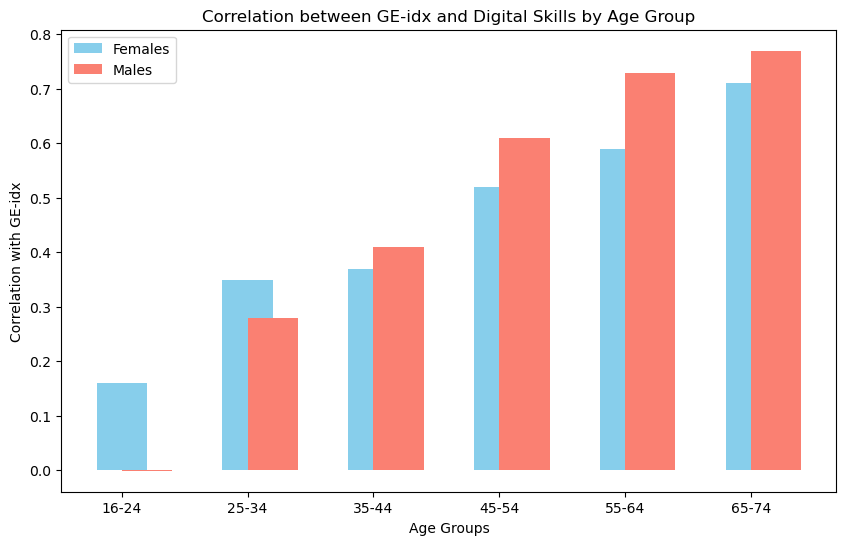

In [5]:
# Step 4: Visualize Correlations by Age and Gender
import matplotlib.pyplot as plt

# Correlation values for age groups
age_groups = ['16-24', '25-34', '35-44', '45-54', '55-64', '65-74']
female_corr = [0.16, 0.35, 0.37, 0.52, 0.59, 0.71]
male_corr = [-0.001, 0.28, 0.41, 0.61, 0.73, 0.77]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(age_groups, female_corr, color='skyblue', label='Females', width=0.4, align='center')
ax.bar(age_groups, male_corr, color='salmon', label='Males', width=0.4, align='edge')
ax.set_xlabel('Age Groups')
ax.set_ylabel('Correlation with GE-idx')
ax.set_title('Correlation between GE-idx and Digital Skills by Age Group')
ax.legend()
plt.show()


5. Analyze and Visualize Education Levels
We analyze how different education levels correlate with GE-idx for women and men.

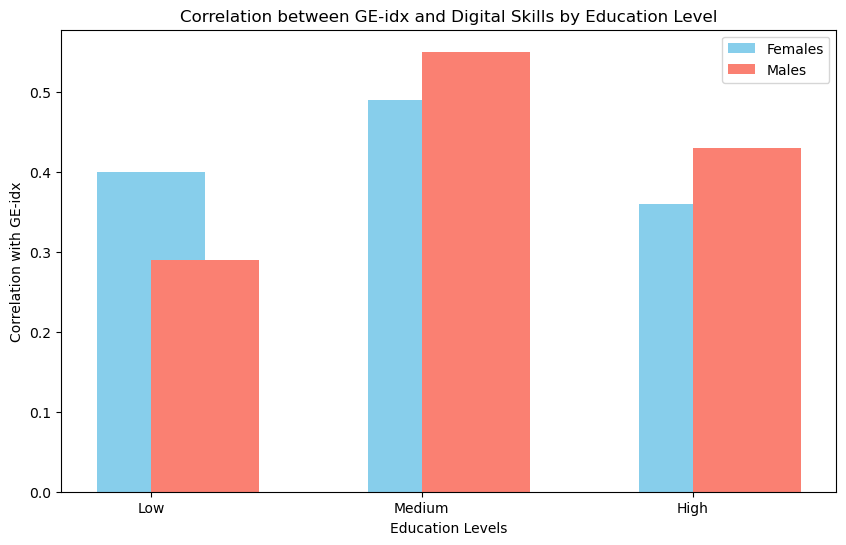

In [6]:
# Step 5: Correlation by Education Level and Gender
education_levels = ['Low', 'Medium', 'High']
female_corr_edu = [0.40, 0.49, 0.36]
male_corr_edu = [0.29, 0.55, 0.43]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(education_levels, female_corr_edu, color='skyblue', label='Females', width=0.4, align='center')
ax.bar(education_levels, male_corr_edu, color='salmon', label='Males', width=0.4, align='edge')
ax.set_xlabel('Education Levels')
ax.set_ylabel('Correlation with GE-idx')
ax.set_title('Correlation between GE-idx and Digital Skills by Education Level')
ax.legend()
plt.show()


6. Correlation Heatmap
We display a heatmap to summarize correlations between GE-idx and digital skills across age groups.

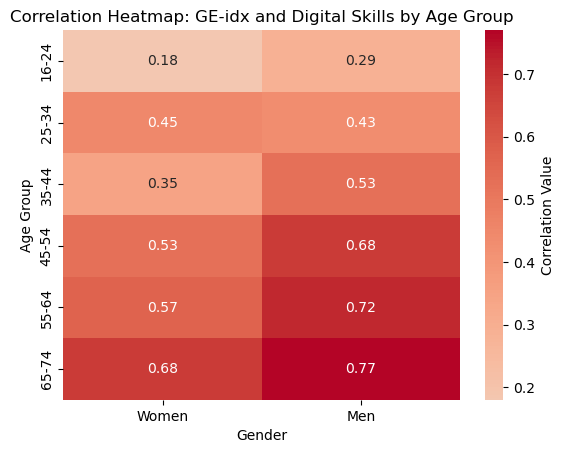

In [7]:
# Step 6: Heatmap of Correlations
import seaborn as sns
import numpy as np

corr_data = np.array([
    [0.18, 0.29], [0.45, 0.43], [0.35, 0.53],
    [0.53, 0.68], [0.57, 0.72], [0.68, 0.77]
])

sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, 
            xticklabels=['Women', 'Men'], yticklabels=age_groups, 
            cbar_kws={'label': 'Correlation Value'})
plt.title('Correlation Heatmap: GE-idx and Digital Skills by Age Group')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()


7. Scatter Plot: Young and Older Women
We combine age groups to analyze younger and older women separately and visualize correlations.

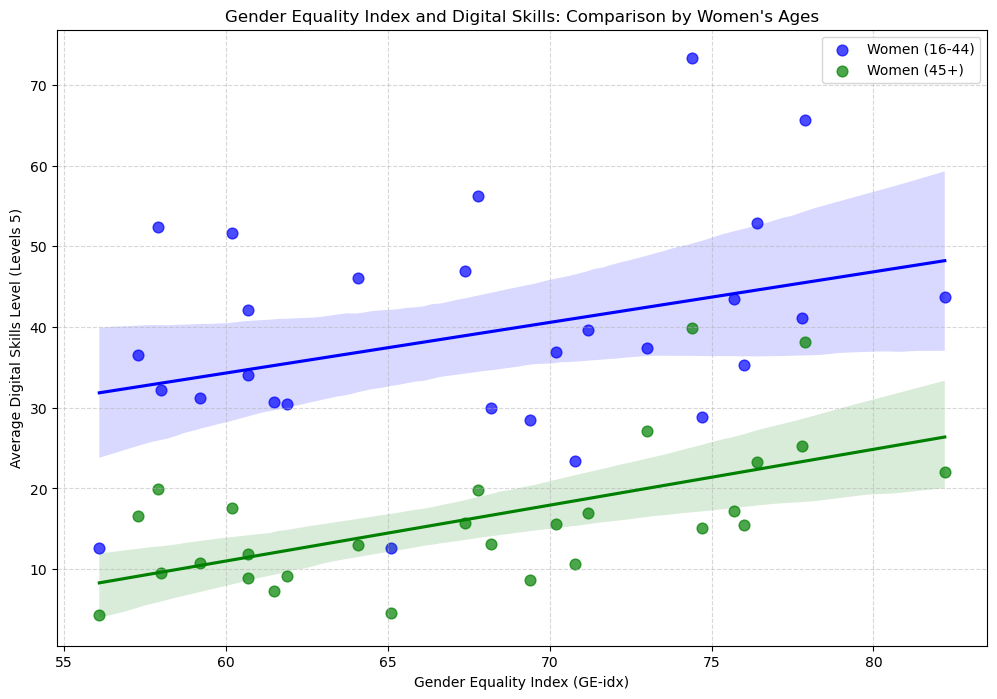

In [8]:
# Step 7: Scatter Plot for Young and Older Women
data['Women_16-44'] = data[['skill_level_5_f_16-24', 'skill_level_5_f_25-34', 'skill_level_5_f_35-44']].mean(axis=1)
data['Women_45-74'] = data[['skill_level_5_f_45-54', 'skill_level_5_f_55-64', 'skill_level_5_f_65-74']].mean(axis=1)

plt.figure(figsize=(12, 8))
sns.regplot(x=data['GE-idx'], y=data['Women_16-44'], label='Women (16-44)',
            scatter_kws={'s': 60, 'alpha': 0.7}, line_kws={'color': 'blue'}, color='blue')
sns.regplot(x=data['GE-idx'], y=data['Women_45-74'], label='Women (45+)',
            scatter_kws={'s': 60, 'alpha': 0.7}, line_kws={'color': 'green'}, color='green')
plt.title("Gender Equality Index and Digital Skills: Comparison by Women's Ages")
plt.xlabel("Gender Equality Index (GE-idx)")
plt.ylabel("Average Digital Skills Level (Levels 5)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


8. Export Final Data
Finally, we export the modified dataset with combined age groups for future use in Tableau.

In [9]:
# Step 8: Export Data for Further Analysis
data.to_csv('df_ds_geidx_m_f_total_with_age_groups.csv', index=False)
